In [1]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

c:\users\scrib\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\scrib\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


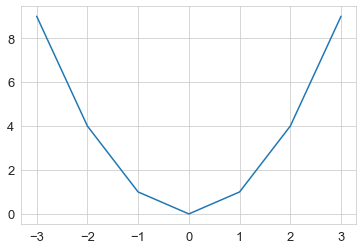

In [3]:
a = -3
b = 3
n = 7 # количество точек
x = np.linspace(a, b, n)
y = x ** 2
plt.plot(x, y)
A = 0
B = 0
h = x[1]-x[0]

[[1.0, 0, 0, 0, 0, 0, 0], [1.0, 4.0, 1.0, 0, 0, 0, 0], [0, 1.0, 4.0, 1.0, 0, 0, 0], [0, 0, 1.0, 4.0, 1.0, 0, 0], [0, 0, 0, 1.0, 4.0, 1.0, 0], [0, 0, 0, 0, 1.0, 4.0, 1.0], [0, 0, 0, 0, 0, 0, 1.0]]
[9.0, 12.0, 12.0, 12.0, 12.0, 12.0, 9.0]
C
[0, 3.0, 2.25, 2.4375, 2.390625, 2.40234375, 0]


TypeError: 'int' object is not subscriptable

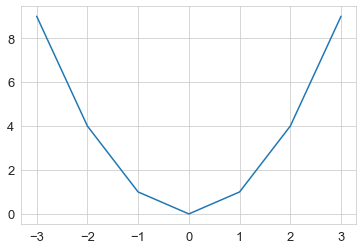

In [4]:
def mycubic10(x, y, xx, A, B):
    # Вычисление коэффициентов кубического сплайна и его значений в заданных точках

    # Входные аргументы
    #    x, y – узлы интерполяции
    #    xx – значения аргумента, для которых надо вычислить кубический сплайн
    #  Выходные аргументы  
    #    yy – значения сплайна в xx
    #    С – матрица коэффициентов кубических полиномов
    #    С = [d(1)      c(1)       b(1)       a1
    #            d(2)      c(2)       b(2)       a2 
    #             ...
    #            d(n-1)   c(n-1)   b(n-1)    a(n-1) ];

    # находим число узлов интерполяции
    n = len(x);

    # преобразуем массивы узлов в вектор-столбцы
    #x = x(:);
    #y = y(:);

    # находим коэффициенты полиномов, образующих сплайн
    #[d, c, b, a]  = CalcCoeffs(x, y);
    C  = CalcCoeffs(x, y, A, B);
    # записываем найденные коэффициенты в матрицу
    #C = [d c b a];

    # создаем нулевой вектор для записи значений сплайна
    yy = [];

    # вычисляем значения сплайна
    # в цикле проходим по отрезкам между узлами интерполирования
    for k in range(0, n):
        # находим индексы элементов массива xx, значения которых 
        # лежат между x(k) и x(k+1)
        ind = -1
        if ((xx[k] >= x[k]) & (xx[k+1] <= x[k+1])):
            ind = k
        # вычисляем значения соответствующего полинома
        yy.append(ind, a[k] + b[k]*(xx[ind]-x[k]) + c[k]*(xx[ind]-x[k]) ** 2 + d[k]*(xx[ind]-x[k]) ** 3)
    return yy

def CalcCoeffs(x, y, A, B, boundary = 1):
    # подфункция для вычисления коэффициентов полиномов кубического сплайна
        
    # находим число узлов
    n = len(x)
    
    #!!!! Как вычисляется h? между изначальными точками?
    h = x[1] - x[0]
    
    gamma1 = 0
    alphan = 0
    if(boundary == 2):
        gamma1 = 1/2
    elif(boundary == 3):
        alphan = 1/2
        
    # вычисляем коэффициенты трехдиагональной матрицы
    
    alpha = []
    for i in range(0, n-1):
        alpha.insert(i, h)
    alpha.insert(n, alphan)
    
    beta = []
    beta.insert(0, 1.)    
    for i in range(1, n-1):
        beta.insert(i, 2 * (h + h))
    beta.insert(n, 1.)
    
    gamma = []
    gamma.insert(0, gamma1)
    for i in range(1, n):
        gamma.insert(i, h)
    
    # формируем трехдиагональную матрицу
    
    D3 = []
    for i in range(0,n):
        D3.append([])
        for j in range(0,n):
            D3[i].append([])

    for i in range(0,n):
        for j in range(0,n):
            if (i == j):
                D3[i][j] = beta[i]
            elif (j == i - 1):
                D3[i][j] = alpha[i]
            elif (j == i + 1):
                D3[i][j] = gamma[i]
            else:
                D3[i][j] = 0
    print(D3)                

    # вычисляем правую часть системы
    
    delta = [];
    delta.insert(0, y[0])
    for i in range(1, n-1):
        delta.insert(i,6*((y[i+1]-y[i])/h - (y[i]-y[i-1]/h)))
    delta.insert(n, y[n-1])
    print(delta)
        
    # решаем систему относительно тангенсов углов наклона сплайна в узлах
    C = delta
    if(boundary == 1):
        C[0] = A
        for i in range(1,len(delta) - 1):
            C[i] = (C[i] - np.dot(D3[i][:i], C[:i]))/D3[i][i]
        C[n-1] = B
    elif(boundary == 2):
        C[0] = 3/h*((y[1] - y[0])/h - A) - 1/2*C[1]
    elif(boundary == 3):
        C[n-1] = 3/h*(B - (y[n-1] - y[n-2])/h) - 1/2*C[n-2]
        
    print("C")
    print(C)
    # расширяем полученный вектор, добавляя граничные условия
    #b = [0; b; 0];
    # находим остальные коэффициенты полиномов
    #a = y(1:n-1);
    #c = (3*df - b(2:n) - 2*b(1:n-1))./h;
    #d = (b(1:n-1) + b(2:n) - 2*df)./h.^2;
    # удаляем последний элемент вектора b, который содержит тангенс угла наклона в x(n),
    # т.к. он не является коэффициентом последнего полинома
    #b(end) = [];
    
    
#Проверим работу функции mycubic10, проинтерполировав кубическим сплайном (с нулевыми условиями на первую производную на границах отрезка интерполирования) следующую табличную функцию
a = -3
b = 3
n = 7 # количество точек
x = np.linspace(a, b, n)
y = x ** 2
plt.plot(x, y)
xx = [0, 0.5]

A = 0
B = 0
h = x[1]-x[0]

yy = mycubic10(x, y, xx, A, B);